In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [18]:
def BM_normal(length):
    u1 = np.random.uniform(0, 1, length)
    u2 = np.random.uniform(0, 1, length)
    x1 = np.cos(2*np.pi*u1) * np.sqrt(-2*np.log(u2))
#     x2 = np.sin(2*np.pi*u1) * np.sqrt(-2*np.log(u2))
    return x1

def BM_normal_p(length):
    u1 = np.random.uniform(-1, 1, length*2)
    u2 = np.random.uniform(-1, 1, length*2)
    s = u1**2 + u2**2
    cond = (s!=0)&(s<=1)
    s = s[cond][:length]
    u1 = u1[cond][:length]
    u2 = u2[cond][:length]
    x1 = u1 * np.sqrt(-2*np.log(s)/s)
#     x2 = u2 * np.sqrt(-2*np.log(s)/s)
    return x1

def BM_rayleigh(length):
    u = np.random.uniform(0, 1, length)
    x = np.sqrt(-2*np.log(u))
    return x

def BM_rayleigh_p(length):
    u1 = np.random.uniform(-1, 1, length*2)
    u2 = np.random.uniform(-1, 1, length*2)
    s = u1**2 + u2**2
    cond = (s!=0)&(s<=1)
    s = s[cond][:length]
    x = np.sqrt(-2*np.log(s))
    return x

In [19]:
normal_b = BM_normal(10**7)
normal_p = BM_normal_p(10**7)

Text(0.5, 1.0, 'Гистограмма вектора гауссовских случайных величин c \n использованием базовой формы')

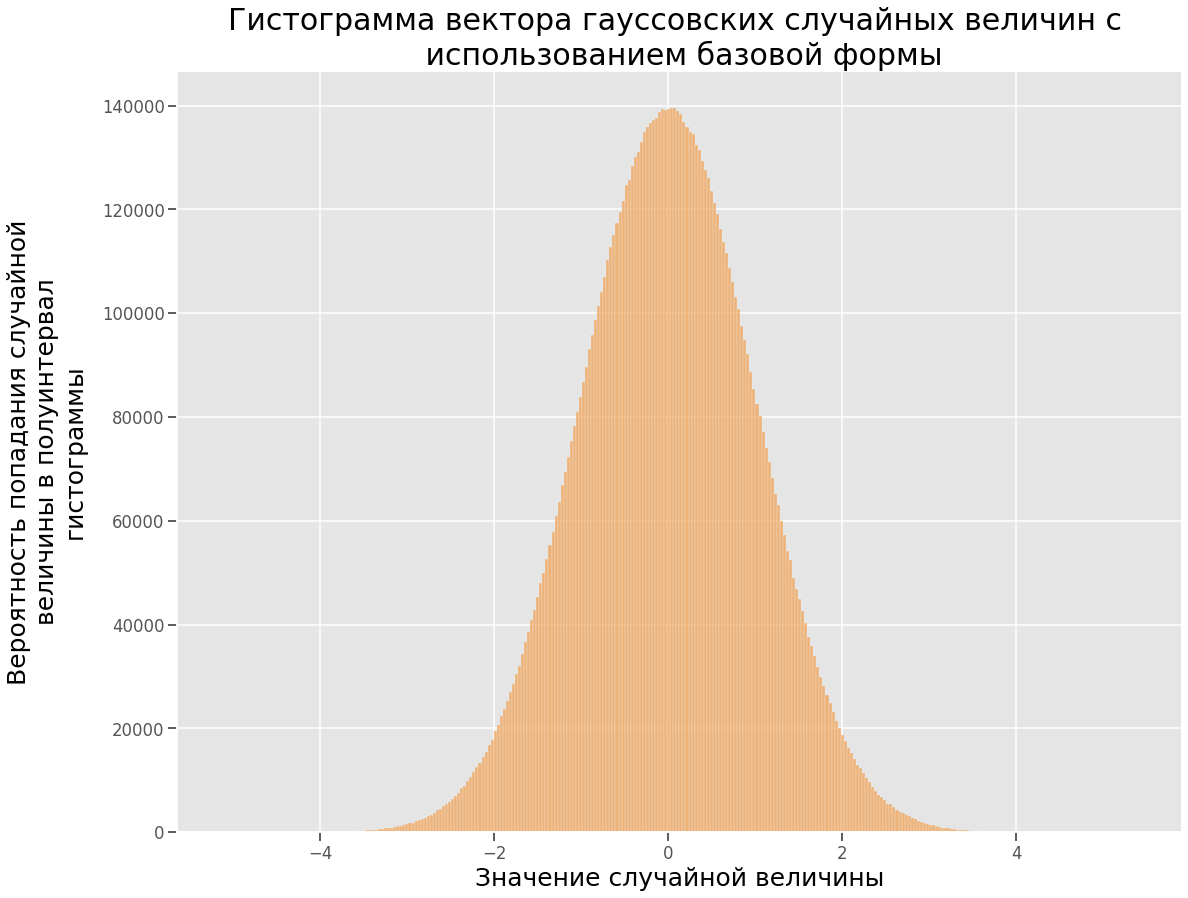

In [40]:
plt.figure(figsize=(18, 14))
sns.set_context('talk')
sns.histplot(normal_b, bins=300, color='#F1A253')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора гауссовских случайных величин c \n использованием базовой формы',
          fontsize=30)

Text(0.5, 1.0, 'Гистограмма вектора гауссовских случайных величин c \n использованием полярной формы')

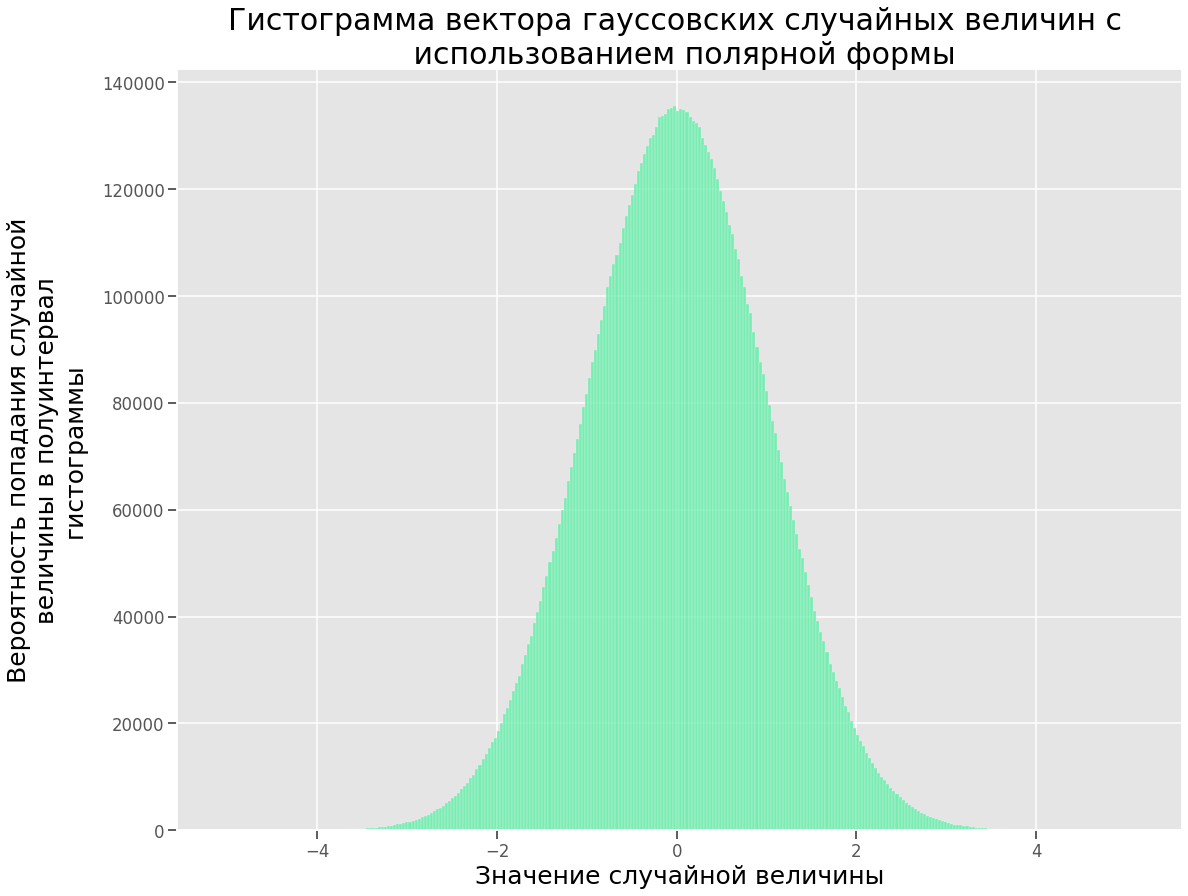

In [41]:
plt.figure(figsize=(18, 14))
sns.set_context('talk')
sns.histplot(normal_p, bins=300, color='#53F1A2')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора гауссовских случайных величин c \n использованием полярной формы',
          fontsize=30)

In [42]:
rayleigh_b = BM_rayleigh(10**7)
rayleigh_p = BM_rayleigh_p(10**7)

Text(0.5, 1.0, 'Гистограмма вектора случайных величин Рэлея\n в базовой форме')

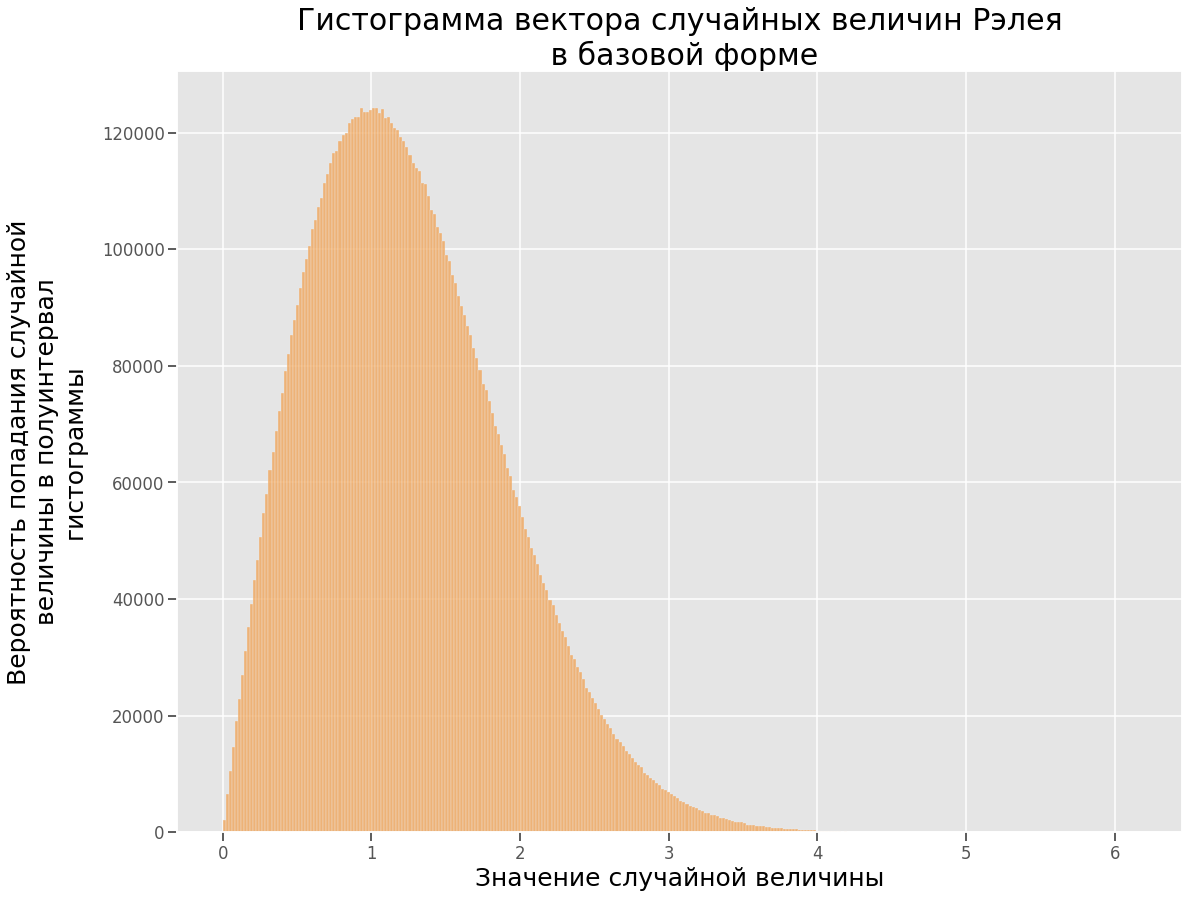

In [54]:
plt.figure(figsize=(18, 14))
sns.set_context('talk')
sns.histplot(rayleigh_b, bins=300, color='#F1A253')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора случайных величин Рэлея\n в базовой форме',
          fontsize=30)

Text(0.5, 1.0, 'Гистограмма вектора случайных величин Рэлея\n в полярной форме')

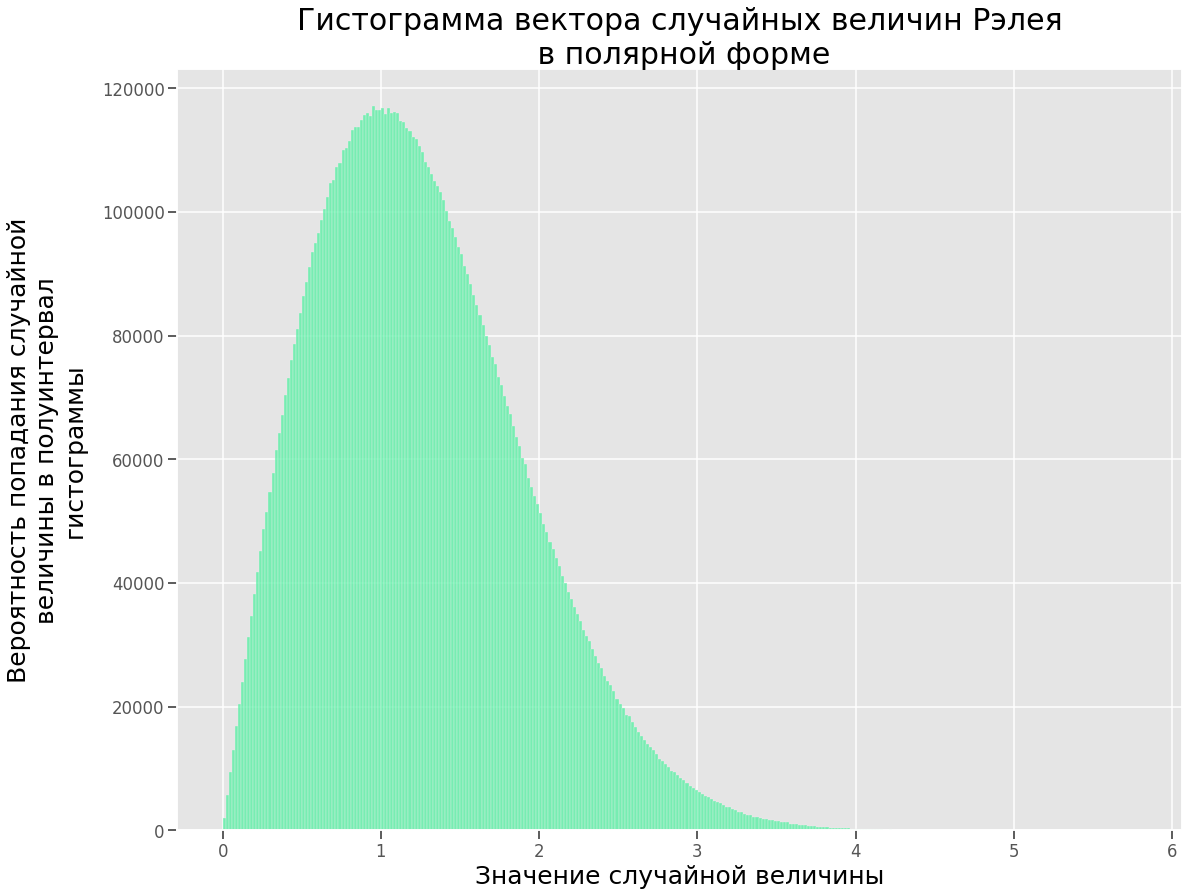

In [55]:
plt.figure(figsize=(18, 14))
sns.set_context('talk')
sns.histplot(rayleigh_p, bins=300, color='#53F1A2')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора случайных величин Рэлея\n в полярной форме',
          fontsize=30)

In [48]:
normal = np.random.normal(size=10**7)
rayleigh = np.random.rayleigh(size=10**7)

Text(0.5, 1.0, 'Гистограмма вектора гауссовских случайных величин')

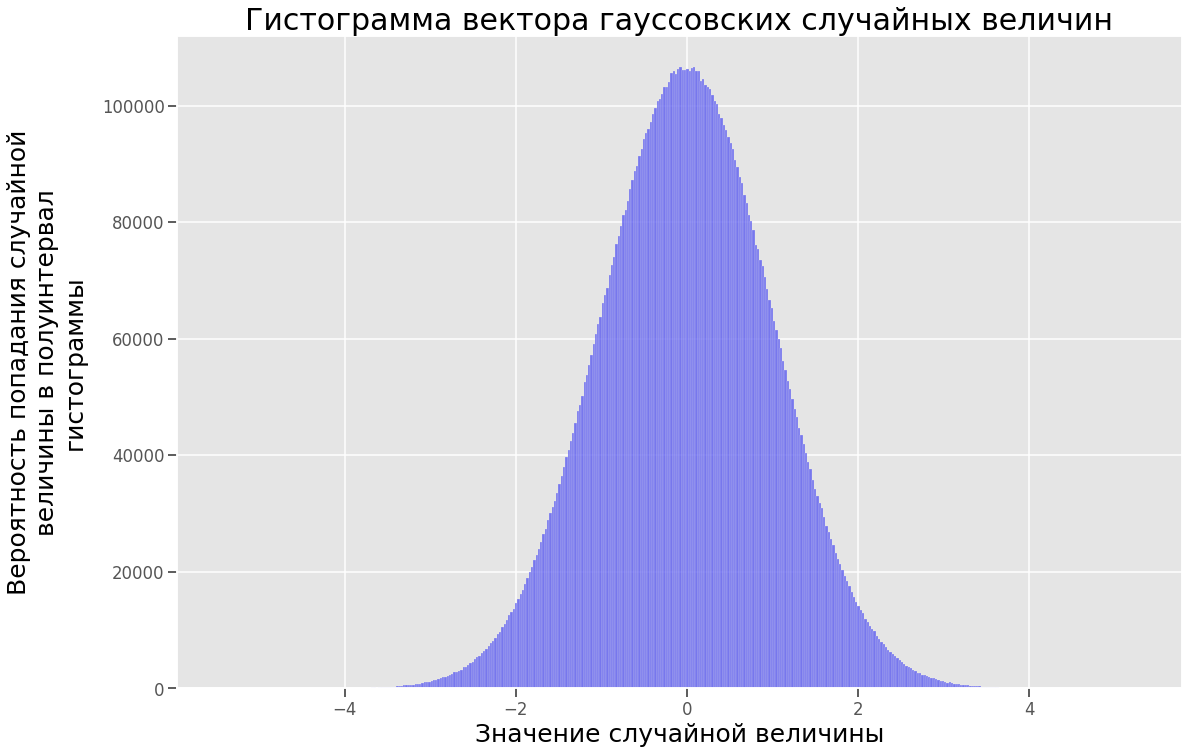

In [52]:
plt.figure(figsize=(18, 12))
sns.set_context('talk')
sns.histplot(normal, bins=400, color='#5353F1')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора гауссовских случайных величин', fontsize=30)

Text(0.5, 1.0, 'Гистограмма вектора случайных величин Рэлея')

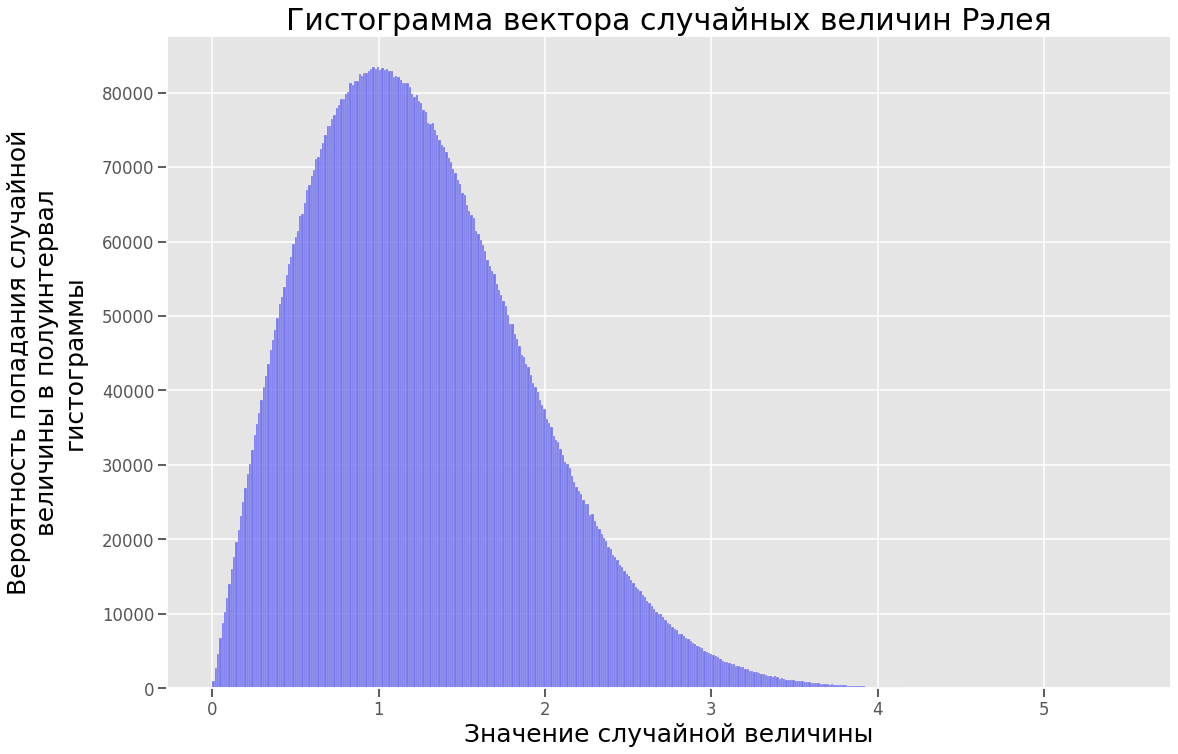

In [51]:
plt.figure(figsize=(18, 12))
sns.set_context('talk')
sns.histplot(rayleigh, bins=400, color='#5353F1')
plt.xlabel('Значение случайной величины', fontsize=25, color='k')
plt.ylabel('Вероятность попадания случайной\n величины в полуинтервал \nгистограммы',
           fontsize=25, color='k', labelpad=15)
plt.title('Гистограмма вектора случайных величин Рэлея', fontsize=30)

In [55]:
def D_KL(p, q):
    length = len(p)
    p = np.sort(p)
    q = np.sort(q)
    c = int(np.floor(1+np.log2(length)))
    maximum = max(np.max(p), np.max(q))
    minimum = min(np.min(p), np.min(q))
    height = (maximum - minimum)/c
    l = np.arange(minimum, maximum, height)
    r = l + height
    l[0] = l[0] - 0.1
    r[0] = r[0] + 0.1
    intervals = [(left, right) for left, right in zip(l, r)]
    probs = np.zeros((len(intervals), 2))
    for num, d in enumerate((p, q)):
        k = 0
        for X in d:
            if X>=intervals[k][0] and X<intervals[k][1]:
                probs[k][num] += 1
            else:
                probs[k+1][num] += 1
                k += 1
    probs /= length
    return st.entropy(probs[:, 0], probs[:, 1])

In [57]:
print(f'Значения метрики расстояния Кульбака-Лейблера:\n')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
{D_KL(normal, normal_b)}\n''')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
{D_KL(normal, normal_p)}\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
{D_KL(rayleigh, rayleigh_b)}\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
{D_KL(rayleigh, rayleigh_p)}\n''')

Значения метрики расстояния Кульбака-Лейблера:

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.464173916228941e-06

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.7570482612155475e-06

Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.62028257982049e-06

Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
inf



In [58]:
print(f'Значения метрики расстояния Кульбака-Лейблера:\n')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.464173916228941e-06\n''')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.7570482612155475e-06\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.62028257982049e-06\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.89432149123451e-06\n''')


Значения метрики расстояния Кульбака-Лейблера:

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.464173916228941e-06

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.7570482612155475e-06

Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
2.62028257982049e-06

Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.89432149123451e-06



___

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform as U, normal as N, rayleigh as R
plt.rcParams['axes.facecolor'] = '#F3F2CC'
%matplotlib inline

In [3]:
def BM_rayl_p(N):
    u1, u2 = U(-1, 1, N*2),U(-1, 1, N*2)
    u = u1**2 + u2**2
    cond = (u!=0)&(u<=1)
    u = u[cond][:N]
    a = np.sqrt(-2*np.log(u))
    return a

def BM_norm(N):
    return np.cos(2*np.pi*U(0, 1, N))*np.sqrt(-2*np.log(U(0, 1, N) ))

def BM_norm_p(N):
    u1, u2 = U(-1, 1, N*2), U(-1, 1, N*2)
    u = u1**2 + u2**2
    cond = (u!=0)&(u<=1)
    u, u1 = u[cond][:N], u1[cond][:N]
    a = u1 * np.sqrt(-2*np.log(u)/u)
    return a

def BM_rayl(N):
    return np.sqrt(-2*np.log(U(0, 1, N)))

norm_b = BM_norm(10**7)
norm_p = BM_norm_p(10**7)

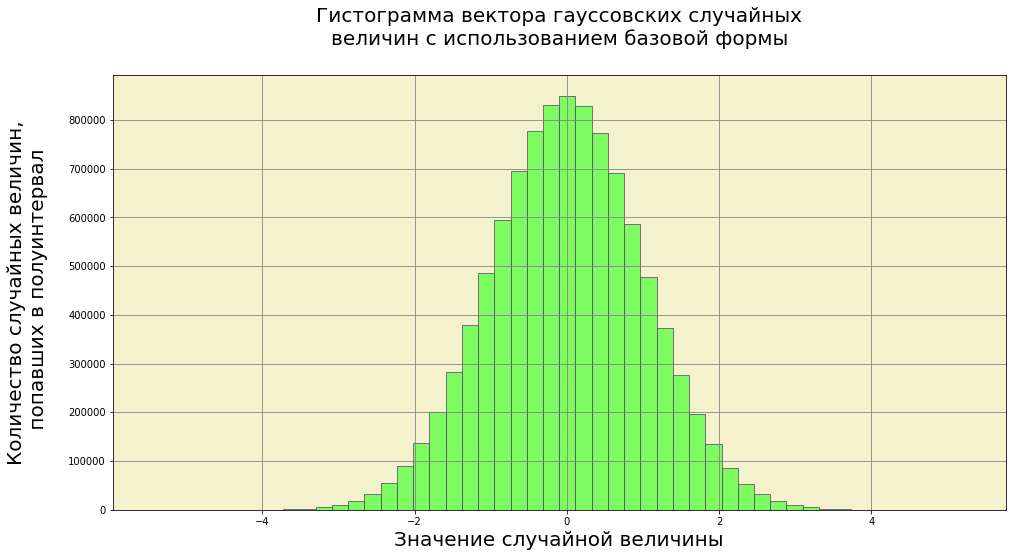

In [9]:
plt.figure(figsize=(16, 8))
plt.hist(norm_b, bins=50, facecolor='#59FF3F', alpha=0.75, edgecolor='#59466C')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора гауссовских случайных
величин с использованием базовой формы''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

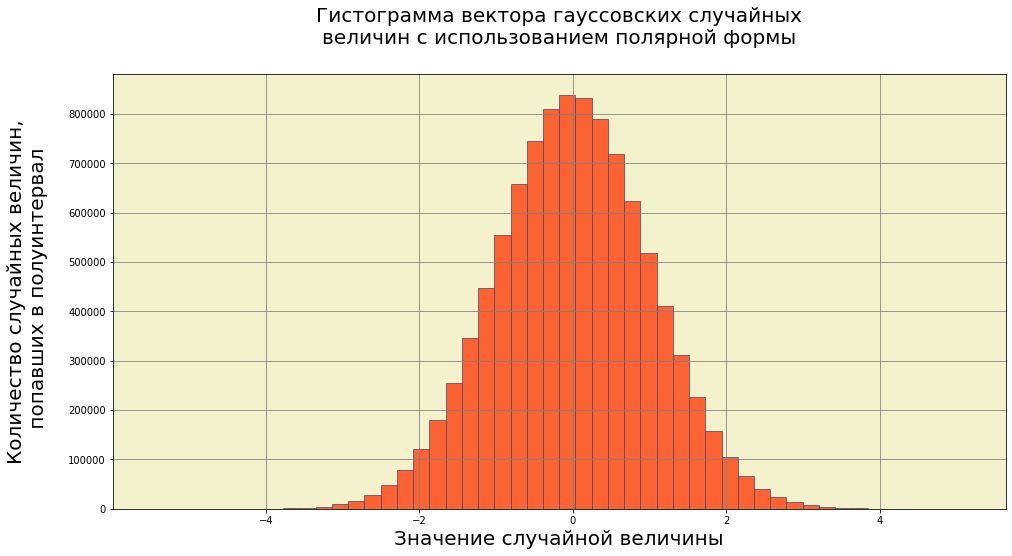

In [12]:
plt.figure(figsize=(16, 8))
plt.hist(norm_p, bins=50, facecolor='#FF3300', alpha=0.75, edgecolor='#59466C')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора гауссовских случайных
величин с использованием полярной формы''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

In [13]:
rayl_b = BM_rayl(10**7)
rayl_p = BM_rayl_p(10**7)

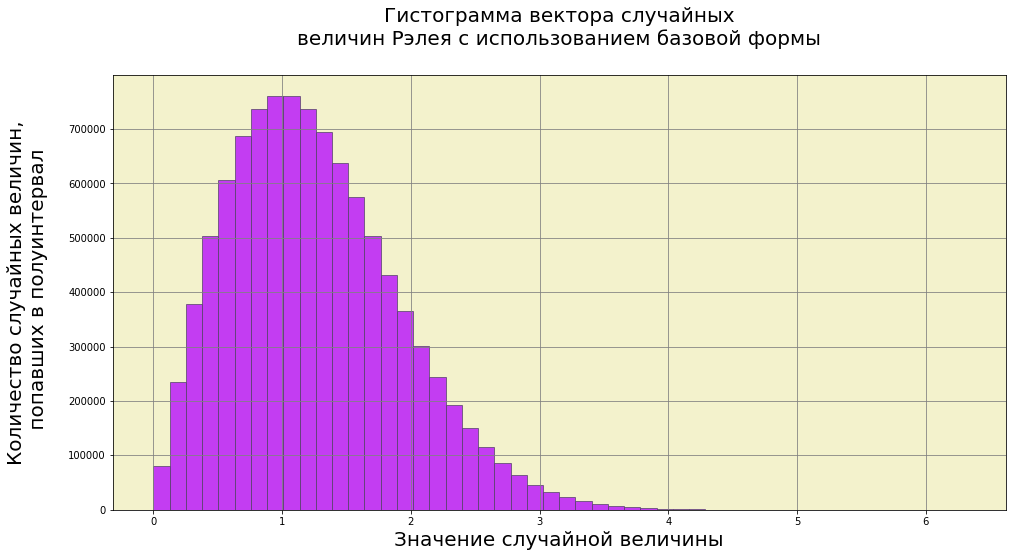

In [14]:
plt.figure(figsize=(16, 8))
plt.hist(rayl_b, bins=50, facecolor='#B300FF', alpha=0.75, edgecolor='#59466C')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора случайных
величин Рэлея с использованием базовой формы''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

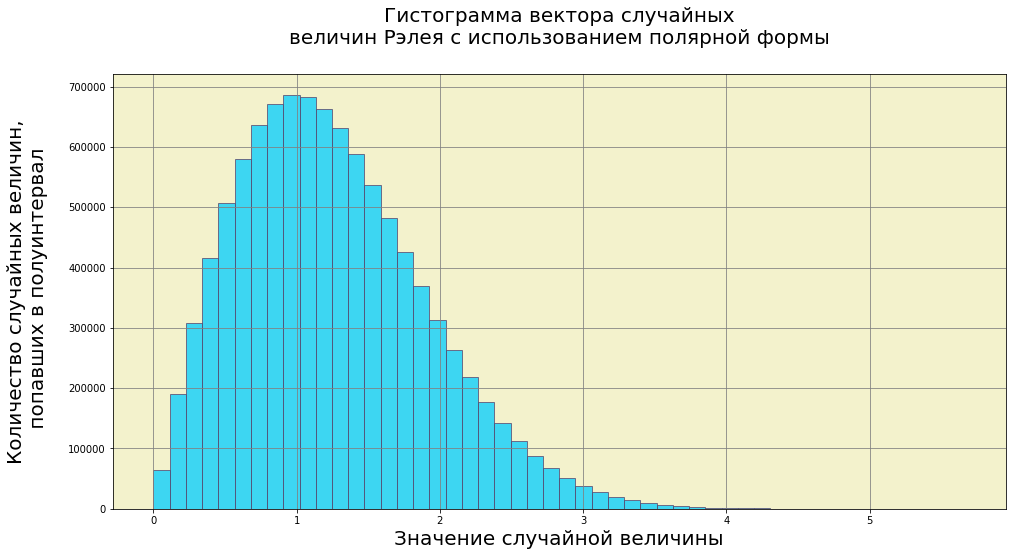

In [15]:
plt.figure(figsize=(16, 8))
plt.hist(rayl_p, bins=50, facecolor='#00CDFF', alpha=0.75, edgecolor='#59466C')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора случайных
величин Рэлея с использованием полярной формы''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

In [16]:
norm = N(size=10**7)
rayl = R(size=10**7)

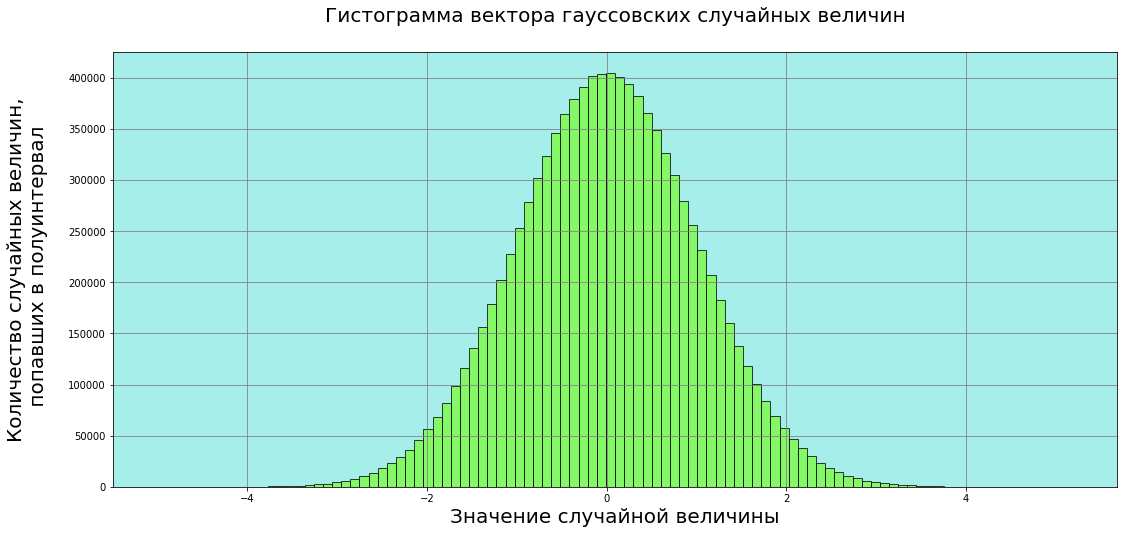

In [19]:
plt.rcParams['axes.facecolor'] = '#A6EEE9'
plt.figure(figsize=(18, 8))
plt.hist(norm, bins=100, facecolor='#7BFC3B', alpha=0.75, edgecolor='#000000')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора гауссовских случайных величин''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

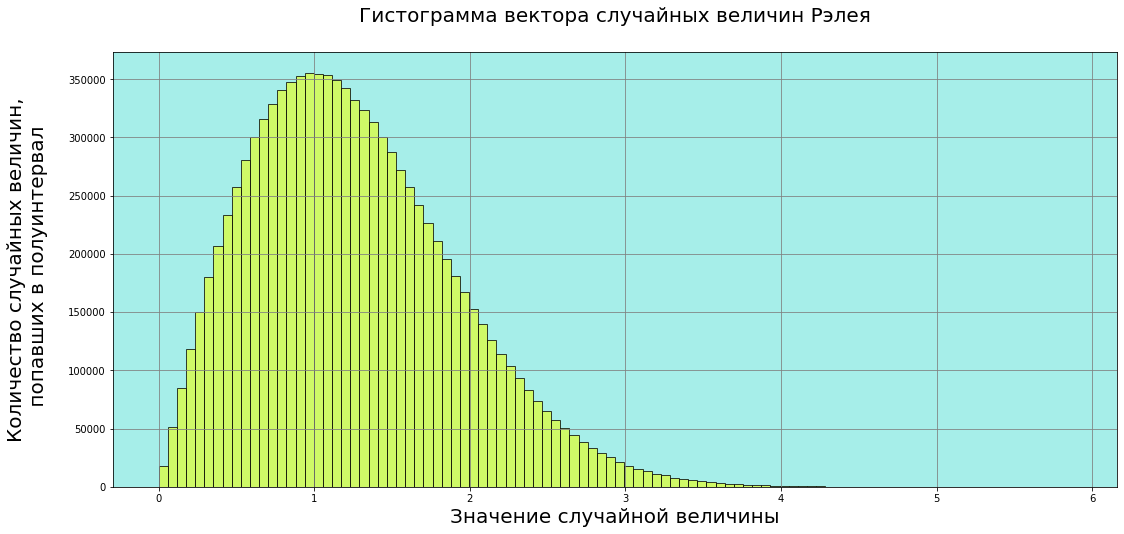

In [21]:
plt.figure(figsize=(18, 8))
plt.hist(rayl, bins=100, facecolor='#DDFD3B', alpha=0.75, edgecolor='#000000')
plt.xlabel('Значение случайной величины', fontsize=20, color='k')
plt.xticks(color='k')
plt.yticks(color='k')
plt.ylabel('Количество случайных величин,\n попавших в полуинтервал', fontsize=20, labelpad=20, color='k')
plt.title('''Гистограмма вектора случайных величин Рэлея''',
          fontsize=20, pad=30)
plt.grid(True, color='gray')

In [22]:
def D_KL(p, q):
    N = len(p)
    p = np.sort(p)
    q = np.sort(q)
    c = int(np.floor(1+np.log2(N)))
    maximum = max(np.max(p), np.max(q))
    minimum = min(np.min(p), np.min(q))
    height = (maximum - minimum)/c
    l = np.arange(minimum, maximum, height)
    r = l + height
    l[0] = l[0] - 0.1
    r[-1] = r[-1] + 0.1
    intervals = [(left, right) for left, right in zip(l, r)]
    probs = np.zeros((len(intervals), 2))
    for num, d in enumerate((p, q)):
        k = 0
        for X in d:
            if X>=intervals[k][0] and X<intervals[k][1]:
                probs[k][num] += 1
            else:
                probs[k+1][num] += 1
                k += 1
    probs /= N
    eps = 1e-10
    Dkl = sum([p*np.log((p+eps)/(q+eps)) for p, q in zip(probs[:, 0], probs[:, 1])])
    return Dkl

In [23]:
print(D_KL(norm, norm_b), D_KL(norm, norm_p), D_KL(rayl, rayl_b), D_KL(rayl, rayl_p))

2.748209293743343e-06 2.2305041392382686e-06 2.5469219918761454e-06 2.8890782515279904e-06


In [64]:
print(f'Значения метрики расстояния Кульбака-Лейблера:\n')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
{D_KL(norm, norm_b)}\n''')
print(f'''Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
{D_KL(norm, norm_p)}\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
{D_KL(rayl, rayl_b)}\n''')
print(f'''Между распределением Рэлея с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
{D_KL(rayl, rayl_p)}\n''')

Значения метрики расстояния Кульбака-Лейблера:

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в базовой форме и стандартной функции:
1.3001759018432901e-06

Между распределением гауссовских чисел с использованием
преобразования Бокса-Мюллера в полярной форме и стандартной функции:
2.7267795946410805e-06



KeyboardInterrupt: 

In [6]:

from numpy import arange
from scipy.stats import norm 
import matplotlib.pyplot as plt
plt.style.use('grayscale')

%matplotlib inline

In [10]:
arange(0.5, 1.1, 0.3)

array([0.5, 0.8, 1.1])

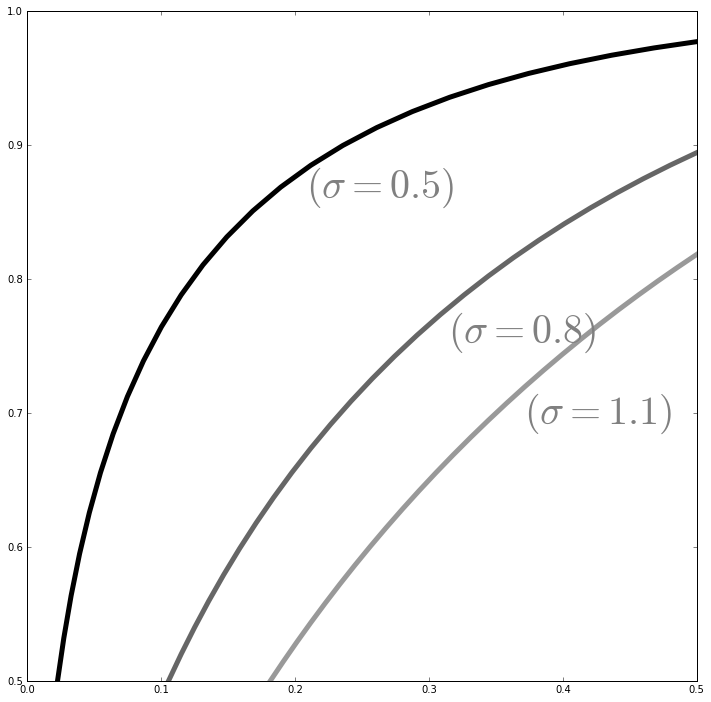

In [22]:
plt.figure(figsize=(12, 12))
for s in arange(0.5, 1.1, 0.3):
    Pds, Pfas = [], []
    for l in arange(0, 1.01, 0.04):
        Pfas.append(1 - norm.cdf(l/s))
        Pds.append(1 - norm.cdf((l-1)/s))
    ax = plt.plot(Pfas, Pds, linewidth=5)
    coord = ax[0].get_xydata()[12]
    plt.annotate(f'$(\sigma={s:.4})$', (coord[0] + 0.04, coord[1]+ 0.01),
                 color='gray', fontsize=40)
#     plt.tick_params(axis='x', colors='black')
#     plt.tick_params(axis='y', colors='red')

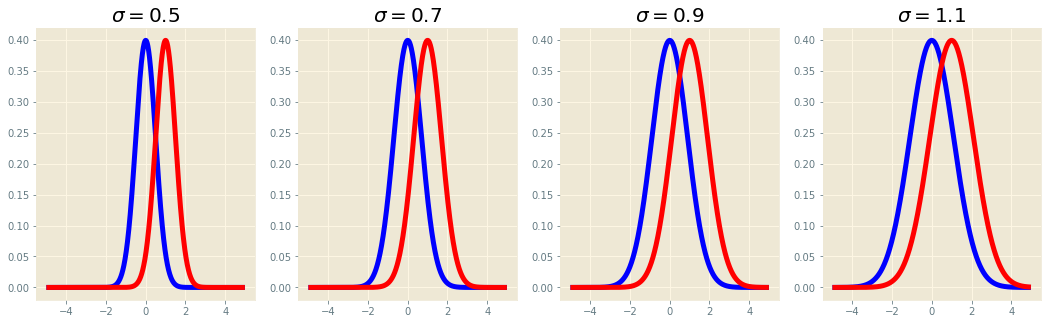

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

for i, s in enumerate(arange(0.5, 1.2, 0.2)):
    plt.figure(figsize=(12, 4))
    xs = arange(-5, 5, 0.01)
    d1, d2 = [norm.pdf(x/s) for x in xs], [norm.pdf((x-1)/s) for x in xs]
    axs[i%4].plot(xs, d1, color='b', linewidth=5)
    axs[i%4].plot(xs, d2, color='r', linewidth=5)
    axs[i%4].set_title(f'$\sigma={s:.1f}$', fontsize=20);